# `Titanic Survival Prediction`

## `Project overview`

Develop a machine learning model to predict passenger survival on the Titanic based on individual attributes. The goal is to uncover patterns in the data that contribute to survival outcomes during the Titanic disaster.


## `Problem Statement` 

Develop a machine learning model to predict the likelihood of survival for passengers aboard the Titanic. Analyze and model the relationships between individual attributes, such as age, gender, class, fare, and cabin, to accurately classify whether a passenger survived or not during the Titanic disaster.

This project aims to contribute insights into the factors that played a significant role in passenger survival, leveraging historical data for predictive modeling. The ultimate goal is to develop a robust model that can be applied to similar scenarios, improving risk assessment and safety measures in the travel industry.


## `Project objectives`

**Predictive Modeling**

Develop a machine learning model to predict whether a passenger survived or not during the Titanic disaster based on historical data.

## `Evaluation of metrics`

In line with the main project objective of predicting passenger survival, the model's performance will be assessed using the following metrics:

1. `Accuracy:` Measures the overall correctness of the survival predictions.
2. `Precision:` Indicates the proportion of correctly predicted survivors among the predicted survivors.
3. `Recall (Sensitivity):` Measures the proportion of correctly predicted survivors among the actual survivors.
4. `F1 Score:` Provides a balance between precision and recall, crucial for achieving accurate predictions.

These metrics collectively offer insights into the model's effectiveness in predicting passenger survival during the Titanic disaster.

## `Data Understanding`

The Titanic dataset, consisting of 418 entries and 12 columns, provides information about passengers aboard the Titanic during its ill-fated voyage. Key columns include:

`PassengerId:` Unique identifier for each passenger.

`Survived:` Binary variable indicating survival (1 for survived, 0 for not survived).

`Pclass:` Ticket class (1st, 2nd, or 3rd).

`Name:` Name of the passenger.

`Sex:` Gender of the passenger.

`Age:` Age of the passenger (with some missing values).

`SibSp:` Number of siblings or spouses aboard.

`Parch:` Number of parents or children aboard.

`Ticket:` Ticket number.

`Fare:` Fare paid for the ticket (with a missing value).

`Cabin:` Cabin number (with several missing values).

`Embarked:` Port of embarkation (C for Cherbourg, Q for Queenstown, S for Southampton).

The dataset captures details of passengers and circumstances related to the Titanic disaster. The project aims to leverage this data to predict passenger survival.

## `Data preparation`

#### Loading the Dataset

In [84]:
#importing libraries 
import pandas as pd


In [85]:
#loading the dataset
df = pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


 ### `Data Cleaning`

To ensure the development of a robust and accurate model, several data cleaning techniques will be applied to the dataset. The following techniques will be employed:

`Completeness:` This technique involves addressing missing values within the dataset. Steps will be taken to identify and handle missing data appropriately, either through imputation or removal, to ensure that the dataset is complete.

`Consistency:` The consistency of the data will be examined to identify any discrepancies or irregularities. Inconsistencies in variables, such as conflicting formats or conflicting information within the dataset, will be addressed and resolved to maintain data integrity.

`Validity:` Validity refers to the accuracy and relevance of the data. Data validation techniques will be applied to verify that the values within each variable align with expected ranges or predefined criteria. Any invalid or erroneous data points will be rectified or removed from the dataset.

`Uniformity:` Uniformity is crucial during the data cleaning process to ensure consistency and accurate analysis. Inconsistent or non-uniform data can introduce errors and bias into the modeling process, leading to unreliable results. Robust techniques will be employed to detect and handle non-uniformity effectively, ensuring that the data is standardized and aligned.

By applying these data cleaning techniques, the dataset will be refined and prepared, ensuring the reliability and accuracy of the data before proceeding with the subsequent stages of analysis and modeling.

<span style="font-size: larger;">`Completeness`.</span>

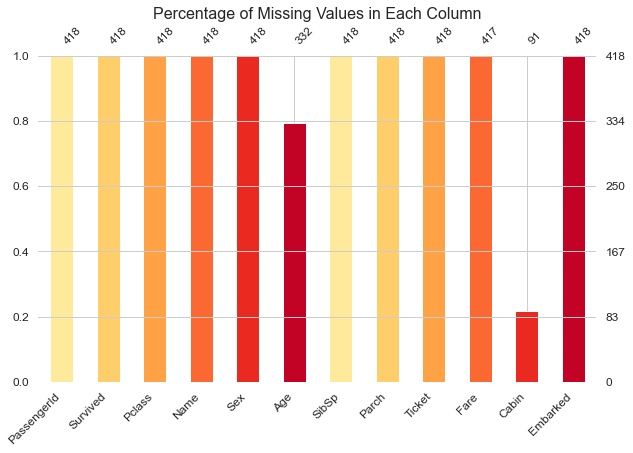

In [87]:
# checking for missing values
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# Set a custom color palette
custom_palette = sns.color_palette("YlOrRd")

# Plot the bar chart with the custom color palette
msno.bar(df, figsize=(10, 6), color=custom_palette, fontsize=12)

# Add title and customize the plot
plt.title('Percentage of Missing Values in Each Column', fontsize=16)
plt.show()

Using Imputation method to handle missing values in `Age` and `Fare` columns

In [88]:
# Filling missing 'Age' values with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [89]:
# Filling missing 'Fare' value with the mean
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

The `Cabin` column has a significant proportion of missing values, approximately 78% (327 out of 418). Considering the high percentage, we drop this column from analysis.

In [90]:
# Dropping the 'Cabin' column
df.drop('Cabin', axis=1, inplace=True)

In [91]:
#checking to see if the missing values are still there
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<span style="font-size: larger;">`Consistency`.</span>


In [92]:
# checking for duplicates
print(f'The data has {df.duplicated().sum()} duplicates')

The data has 0 duplicates


The data has no duplicates hence it's consistent.

<span style="font-size: larger;">`Validity`.</span>

1. `Validating Numerical Values:`

we can use statistical methods to identify values that fall outside expected ranges or criteria.

In [93]:
# Validating numerical columns ('Age', 'Fare')
# Define expected ranges or criteria
age_range = (0, 100)  # Example age range
fare_range = (0, float('inf'))  # Example fare range

# Check for values outside the expected ranges
invalid_age_values = df.loc[~df['Age'].between(*age_range), 'Age']
invalid_fare_values = df.loc[~df['Fare'].between(*fare_range), 'Fare']

# Display the invalid values
print("Invalid Age Values:")
print(invalid_age_values)

print("\nInvalid Fare Values:")
print(invalid_fare_values)

Invalid Age Values:
Series([], Name: Age, dtype: float64)

Invalid Fare Values:
Series([], Name: Fare, dtype: float64)


There are no invalid values for the `Age` and `Fare` columns based on the specific validity criteria we checked.

2. `Validating Categorical Values:`

For categorical variables, we define a set of valid categories and identify any values that do not match.

In [94]:
# Validating categorical columns ('Sex', 'Embarked')
# Define valid categories
valid_sex_categories = {'male', 'female'}
valid_embarked_categories = {'C', 'Q', 'S'}

# Check for values not in the valid categories
invalid_sex_values = df.loc[~df['Sex'].isin(valid_sex_categories), 'Sex']
invalid_embarked_values = df.loc[~df['Embarked'].isin(valid_embarked_categories), 'Embarked']

# Display the invalid values
print("Invalid Sex Values:")
print(invalid_sex_values)

print("\nInvalid Embarked Values:")
print(invalid_embarked_values)

Invalid Sex Values:
Series([], Name: Sex, dtype: object)

Invalid Embarked Values:
Series([], Name: Embarked, dtype: object)


<span style="font-size: larger;">`Uniformity`.</span>

Column: Sex
Unique Values: ['male' 'female']
Value Counts:
 male      266
female    152
Name: Sex, dtype: int64
----------------------------


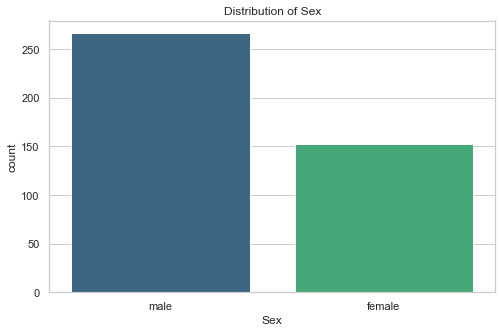

Column: Embarked
Unique Values: ['Q' 'S' 'C']
Value Counts:
 S    270
C    102
Q     46
Name: Embarked, dtype: int64
----------------------------


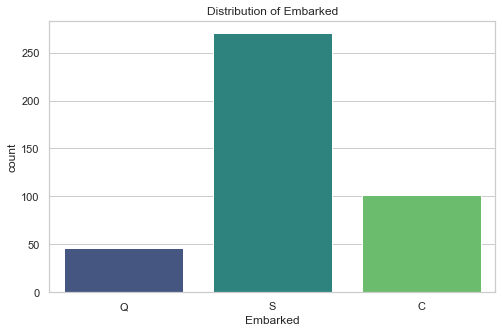

Column: Survived
Unique Values: [0 1]
Value Counts:
 0    266
1    152
Name: Survived, dtype: int64
----------------------------


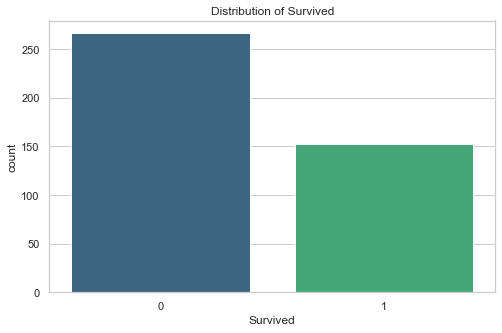

In [95]:
#creating a function to check for uniformity 
def check_uniformity(dataframe, columns):
    for column in columns:
        unique_values = dataframe[column].unique()
        value_counts = dataframe[column].value_counts()

        print(f"Column: {column}")
        print("Unique Values:", unique_values)
        print("Value Counts:\n", value_counts)
        print("----------------------------")

        # Plot a bar chart for value counts
        plt.figure(figsize=(8, 5))
        sns.countplot(x=dataframe[column], palette='viridis')
        plt.title(f'Distribution of {column}')
        plt.show()

# Example usage:
# Specify the columns you want to check for uniformity
columns_to_check = ['Sex', 'Embarked', 'Survived']

# Call the function
check_uniformity(df, columns_to_check)

Both `Sex` and `Embarked` columns appear to be uniform, with consistent and expected values. There is no indication of irregularities or unexpected variations in these categorical columns based on the provided output

**Creating categorical variable for traveling alone and label encoding**

In [96]:
from sklearn.preprocessing import LabelEncoder

# 'SibSp' and 'Parch' are columns representing the number of siblings/spouses and parents/children aboard
# Create a new column 'TravelAlone' based on the sum of 'SibSp' and 'Parch'
df['TravelAlone'] = df['SibSp'] + df['Parch']

# Map the values to create a binary 'TravelAlone' column (1 if traveling alone, 0 if not)
df['TravelAlone'] = df['TravelAlone'].map(lambda x: 1 if x == 0 else 0)

# Apply label encoding to the 'TravelAlone' column
label_encoder = LabelEncoder()
df['TravelAlone'] = label_encoder.fit_transform(df['TravelAlone'])

# Display the updated DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,TravelAlone
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0


**Dropping the irrelevant columns**

In [97]:

# In our data the Ticket and passengerID, Name, sibsp and parch are the base less,leds to the false prediction
df.drop(['SibSp', 'Parch', 'PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)

# Display the updated DataFrame
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,male,34.5,7.8292,Q,1
1,1,3,female,47.0,7.0000,S,0
2,0,2,male,62.0,9.6875,Q,1
3,0,3,male,27.0,8.6625,S,1
4,1,3,female,22.0,12.2875,S,0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    object 
 6   TravelAlone  418 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


## `Exploration Data Analysis`

This section will be the exploratory data analysis question where we will exploring and seeing the relationship the different columns

The main two parts in this section are:

-`Categorical Columns`

-`Numerical Columns`

Categorical Columns

The Categorical Columns in the dataset that we shall be analysing are:

-`sex` 

-`Embarked`

Numerical Columns

The Numerical Columns in the dataset that we shall be analysing are:

-`Survived`

-`Pclass`

-`Age`

-`Fare`

-`TravelAlone`

In [99]:
# general statistical summary
df.describe().round(2)

,Survived,Pclass,Age,Fare,TravelAlone
count,418.00,418.00,418.00,418.00,418.00
mean,0.36,2.27,30.27,35.63,0.61
std,0.48,0.84,12.63,55.84,0.49
min,0.00,1.00,0.17,0.00,0.00
25%,0.00,1.00,23.00,7.90,0.00
50%,0.00,3.00,30.27,14.45,1.00
75%,1.00,3.00,35.75,31.50,1.00
max,1.00,3.00,76.00,512.33,1.00


In [100]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

### `Univariate Analysis`

we'll explore each column in the dataset to see the distributions of features and obtain some useful insights.

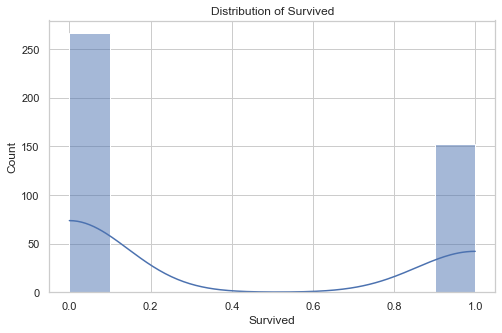

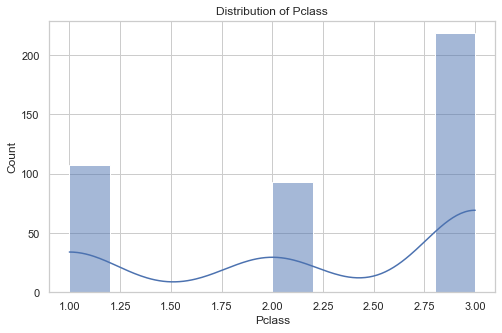

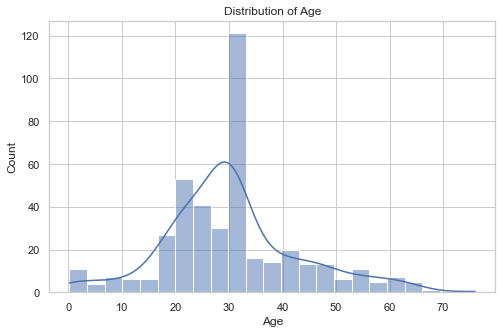

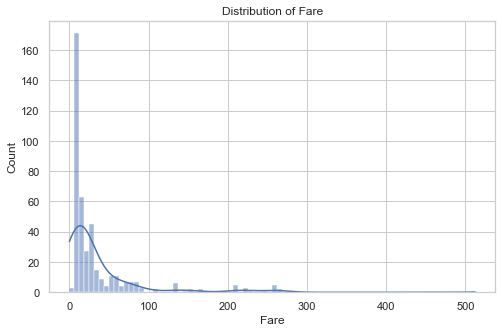

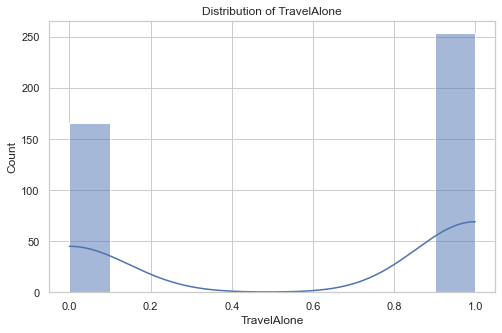

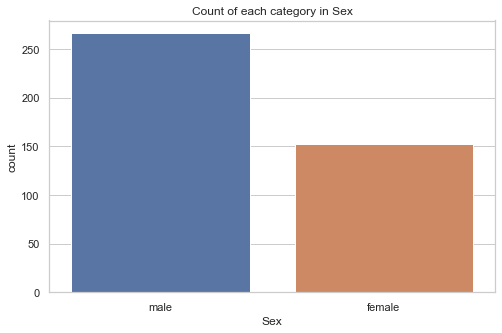

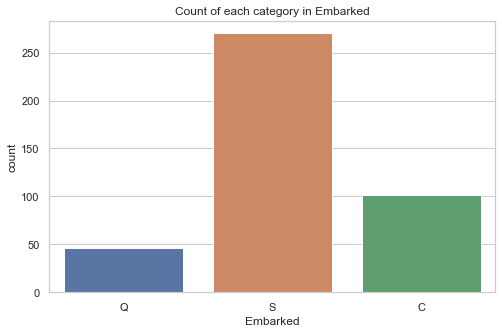

In [101]:
def univariate_analysis(dataframe):
    # Separate numerical and categorical columns
    numerical_cols = dataframe.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = dataframe.select_dtypes(include=['object']).columns

    # Univariate analysis for numerical variables
    for col in numerical_cols:
        plt.figure(figsize=(8, 5))
        sns.histplot(dataframe[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

    # Univariate analysis for categorical variables
    for col in categorical_cols:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=dataframe[col])
        plt.title(f'Count of each category in {col}')
        plt.show()

# Example usage with your DataFrame 'df'
univariate_analysis(df)

`Survived:`

**Conclusion:** The dataset is imbalanced, with a larger representation of non-survivors (0) compared to survivors (1).

`Pclass:`

**Conclusion:** The dataset has a higher proportion of passengers in the third class (Pclass=3), indicating a predominantly lower-class population.

`Age:`

**Conclusion:** The age distribution is diverse, with a concentration of passengers in the young adult age range.

`Fare:`

**Conclusion:** The majority of passengers paid lower fares, but there is a long tail suggesting some passengers paid significantly higher fares.

`Sex:`

**Conclusion:** The dataset is predominantly composed of male passengers.

`Embarked:`

**Conclusion:** The majority of passengers boarded the Titanic from Southampton (S), with Cherbourg (C) as the second most common embarkation port.

`TravelAlone:`

**Conclusion:** More passengers traveled with companions (TravelAlone=0) than those who traveled alone (TravelAlone=1).

### `Bivariate Analysis`

**Does Ticket Class (Pclass) influence Survival?**

<AxesSubplot:xlabel='Pclass', ylabel='count'>

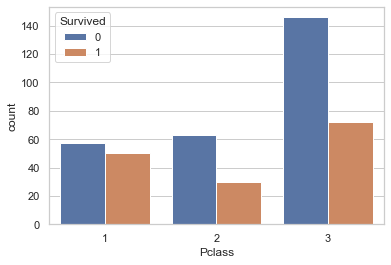

In [102]:
sns.countplot(x='Pclass', hue='Survived', data=df)


**Conclusion**: Pclass appears to be correlated with survival, with a higher proportion of survivors in the 1st class and a lower proportion in the 3rd class.

**Is there a relationship between Gender (Sex) and Survival?**

<AxesSubplot:xlabel='Sex', ylabel='count'>

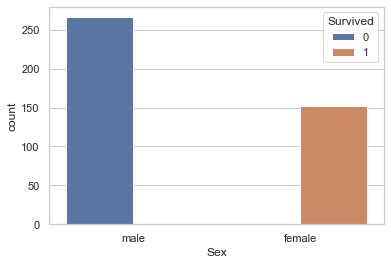

In [103]:
sns.countplot(x='Sex', hue='Survived', data=df)

**Conclusion**: higher proportion of male passengers survived compared to female passengers. The count plot is reflecting that more males survived, and it suggests that factors other than gender might have played a more significant role in the survival outcomes.

**How does Age impact the likelihood of Survival?**

In [104]:
#Create a new colmn age bracket
# Define age bins and labels
age_bins = [0, 12, 18, 25, 35, 45, 65, float('inf')]
age_labels = ['0-12 years old', '12-18 years old', '18-25 years old', '25-35 years old', '35-45 years old', '45-65 years old', '65+ years old']

# Create the 'AgeBracket' column
df['AgeBracket'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Display the updated DataFrame
df.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone,AgeBracket
0,0,3,male,34.5,7.8292,Q,1,25-35 years old
1,1,3,female,47.0,7.0000,S,0,45-65 years old
2,0,2,male,62.0,9.6875,Q,1,45-65 years old
3,0,3,male,27.0,8.6625,S,1,25-35 years old
4,1,3,female,22.0,12.2875,S,0,18-25 years old


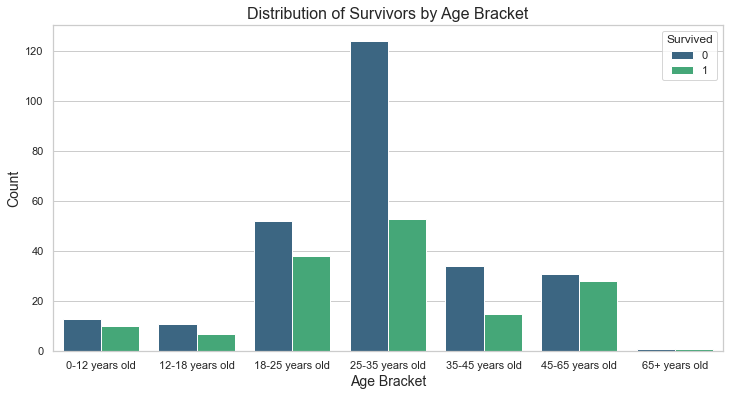

In [105]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='AgeBracket', hue='Survived', data=df, palette='viridis')

# Set the title and labels
plt.title('Distribution of Survivors by Age Bracket', fontsize=16)
plt.xlabel('Age Bracket', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

**Conclusion**: age played a role in survival, with a higher likelihood for children (0-12 years old) and a lower likelihood for seniors (65+ years old). The distribution for middle-aged passengers (45-65 years old) also leans towards a higher count of non-survivors.

**Do Fare and Survival show any correlation?**

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

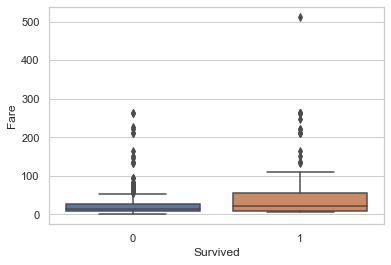

In [106]:
sns.boxplot(x='Survived', y='Fare', data=df)


**Conclusion**: there appears to be a correlation between fare and survival, with survivors generally associated with higher fares.

**Does the Port of Embarkation (Embarked) influence Survival?**

<AxesSubplot:xlabel='Embarked', ylabel='count'>

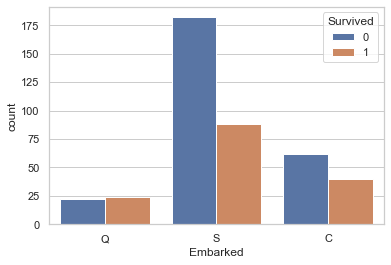

In [107]:
sns.countplot(x='Embarked', hue='Survived', data=df)


**Conclusion**: survival outcomes seem to vary based on the port of embarkation, with passengers from Southampton having both higher survival and non-survival counts.

### `Multivariate Analysis`

Our aim here is to look for the relationship between different features



**What is the proportion of survivors and non-survivors based on embarkation point ('Embarked') and gender ('Sex')?**

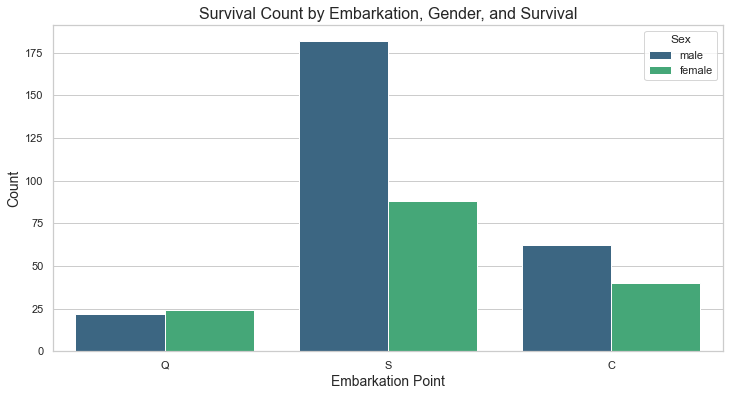

In [118]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a stacked bar plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Embarked', hue='Sex', data=df, palette='viridis', dodge=True)

# Set the title and labels
plt.title('Survival Count by Embarkation, Gender, and Survival', fontsize=16)
plt.xlabel('Embarkation Point', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()



**Conclusion**:

**How does the fare vary for different combinations of class and survival status?**

In [ ]:
# Multivariate analysis using boxplot with color encoding
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df)
plt.title('Boxplot of Fare for Different Classes with Survival Encoding')
plt.show()


**Conclusion**:

**Is there a relationship between traveling alone and survival when considering age and class?**

In [ ]:
# Multivariate analysis using scatterplot with size and color encoding
sns.scatterplot(x='Age', y='Pclass', hue='Survived', size='TravelAlone', data=df)
plt.title('Scatterplot of Age and Pclass with Survival and TravelAlone Encoding')
plt.show()


**Conclusion**:

 `Sex` and `Embarked` are categorical and need encoding, encoding is essential to convert categorical data into a numeric format, meeting the input requirements of machine learning models for predicting passenger survival.

In [35]:
def label_encode_columns(dataframe, columns):
    label_encoder = LabelEncoder()
    for column in columns:
        dataframe[column] = label_encoder.fit_transform(dataframe[column])
    return dataframe

# Example usage for 'Sex' and 'Embarked' columns
columns_to_label_encode = ['Sex', 'Embarked']
df = label_encode_columns(df, columns_to_label_encode)

# Display the updated DataFrame
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,1,34.5,7.8292,1,1
1,1,3,0,47.0,7.0000,2,0
2,0,2,1,62.0,9.6875,1,1
3,0,3,1,27.0,8.6625,2,1
4,1,3,0,22.0,12.2875,2,0


`Sex` Column:
'female' is encoded as 0.
'male' is encoded as 1.

`Embarked` Column:
'Q' is encoded as 1.
'S' is encoded as 2.
'C' is encoded as 0.